In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from ipywidgets import widgets

In [ ]:
spx = pd.read_parquet("SPX.parquet")
vix = pd.read_parquet("VIX4y.parquet")

In [ ]:
spx = spx.set_index("date")
vix = vix.set_index("date")

In [ ]:

spx_1h = pd.DataFrame(spx["close"].resample("1h").mean().dropna().astype("float32"))
vix_1h = vix["close"].resample("1h").mean().dropna().astype("float32")
#spx_1d = spx["close"].resample("1d").mean().dropna().astype("float32")

In [ ]:
spx_1h.info(), vix_1h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8754 entries, 2020-10-19 15:00:00+02:00 to 2025-10-16 20:00:00+02:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   8754 non-null   float32
dtypes: float32(1)
memory usage: 102.6 KB
<class 'pandas.core.series.Series'>
DatetimeIndex: 14029 entries, 2021-10-18 09:00:00+02:00 to 2025-10-16 20:00:00+02:00
Series name: close
Non-Null Count  Dtype  
--------------  -----  
14029 non-null  float32
dtypes: float32(1)
memory usage: 164.4 KB


(None, None)

In [ ]:
spx_1h["ma5"] = spx_1h["close"].rolling(5).mean().round(2)
spx_1h["ma20"] = spx_1h["close"].rolling(20).mean().round(2)
#spx_1h["ma20"] = spx_1h.rolling(20).mean().round(2)

In [ ]:
spx_1h[19:]

,close,ma5,ma20
date,,,
2020-10-21 20:00:00+02:00,3457.790039,3445.47,3455.28
2020-10-21 21:00:00+02:00,3435.129883,3442.71,3452.34
2020-10-22 15:00:00+02:00,3443.590088,3443.36,3450.52
2020-10-22 16:00:00+02:00,3430.939941,3442.19,3448.49
2020-10-22 17:00:00+02:00,3431.340088,3439.76,3446.52
...,...,...,...
2025-10-16 16:00:00+02:00,6693.450195,6680.12,6664.41
2025-10-16 17:00:00+02:00,6666.810059,6680.33,6664.48
2025-10-16 18:00:00+02:00,6656.060059,6675.59,6664.51


In [ ]:
spx_1h = spx_1h.join(vix_1h, how="left", rsuffix="_vix").dropna()

<Axes: >

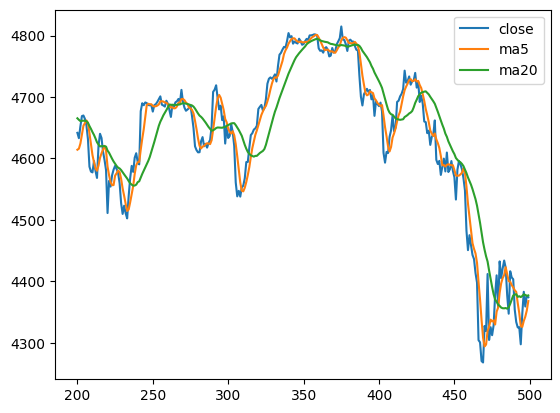

In [ ]:
spx_1h.reset_index()[["close", "ma5", "ma20"]][200:500].plot()

In [ ]:
fig = px.line(spx_1h, y=["close", "ma5", "ma20"], title="SPX_1h_lines")

In [ ]:
fig.show()

In [ ]:
widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

DatePicker(value=None, description='Pick a Date', step=1)